In [5]:
!pip install lightgbm
!pip install xgboost
!pip install catboost
! pip install scikit-optimize

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, DecisionTreeRegressor
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV, validation_curve, cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.utils import resample, shuffle
from sklearn.pipeline import make_pipeline
from sklearn.metrics import calinski_harabasz_score, silhouette_samples, silhouette_score, mean_squared_error, accuracy_score, precision_score, recall_score,  mean_absolute_error, mean_absolute_percentage_error, f1_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from IPython.display import Image

from pydotplus import graph_from_dot_data
import os
import pydotplus

from skopt import BayesSearchCV

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

RANDOM_SEED = 2024

In [7]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [8]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와이빅타/여름방학-2학기/2차 프로젝트/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와이빅타/여름방학-2학기/2차 프로젝트/data/test.csv')

train_prepro = train.copy()
test_prepro = test.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 0801 시도

### 전처리

In [ ]:
train_prepro = train_prepro[(train_prepro['x_1'] < -1.2)]
train_prepro = train_prepro[(train_prepro['x_2'] > 1.15)]
train_prepro = train_prepro[(train_prepro['x_4'] > -0.4)]
train_prepro = train_prepro[(train_prepro['x_5'] < -1.6)]
train_prepro = train_prepro[(train_prepro['x_6'] < 0.52)]
train_prepro = train_prepro[(train_prepro['x_9'] < 0.4)]

train_x = train_prepro.drop(columns = ['ID', 'y'])
train_y = train_prepro['y']
test_x = test_prepro #y값이 없는, 예측해야 하는 x값

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2,
                                                    shuffle=True,random_state=RANDOM_SEED)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train_practice = X_train.copy()
X_test_practice = X_test.copy()
y_train_practice = y_train.copy()
y_test_practice = y_test.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### DT-RFE

In [ ]:
for x in range(1, 12) :
  estimator = DecisionTreeRegressor(random_state=RANDOM_SEED)
  selector = RFE(estimator, n_features_to_select = x)
  selector = selector.fit(X_train_practice, y_train_practice)
  dt_rfe_X_train = selector.transform(X_train_practice)
  dt_rfe_X_test = selector.transform(X_test_practice)
  rf = RandomForestRegressor(random_state=RANDOM_SEED)
  rf.fit(dt_rfe_X_train, y_train)
  test_pred = rf.predict(dt_rfe_X_test)
  print('변수 {}개'.format(x))
  print(mean_squared_error(y_test, test_pred))
  print('')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


변수 1개
11.229579651883954

변수 2개
10.317096874365683

변수 3개
10.205247977653581

변수 4개
10.172201934050138

변수 5개
10.175816006811639

변수 6개
10.259627300267855

변수 7개
10.202463606674561

변수 8개
10.069104623731969

변수 9개
10.18310400517328

변수 10개
10.16790591350865

변수 11개
10.202872962290929



In [ ]:
estimator = DecisionTreeRegressor(random_state=RANDOM_SEED)
selector = RFE(estimator, n_features_to_select = 8)
selector = selector.fit(X_train_practice, y_train_practice)

dt_rfe_features = selector.support_
X_train_practice.columns[dt_rfe_features]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dt_rfe_X_train = selector.transform(X_train_practice)
dt_rfe_X_test = selector.transform(X_test_practice)

test_x = test_x.drop(columns = ['ID'])
dt_rfe_test_x = selector.transform(test_x)
dt_rfe_test_x.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rf_params = {
    'n_estimators': np.arange(100, 300, 2),
    'max_features': np.arange(0, 0.7, 0.05),
    'max_depth': np.arange(5, 40, 5),
}

kf = KFold(n_splits = 5, shuffle = True, random_state = RANDOM_SEED)

rf = RandomForestRegressor(random_state = RANDOM_SEED, n_jobs = -1)
rnd_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = rf_params,
    scoring = 'neg_mean_absolute_error',
    n_iter = 30,  # 7분 30초 소요
    cv=kf,
    random_state=RANDOM_SEED,
    n_jobs = -1
)

cv_res = rnd_search.fit(dt_rfe_X_train, y_train)

best_params = cv_res.best_params_
best_score = cv_res.best_score_

print("Best Parameters:", best_params)
print("Best neg mse Score:", best_score)

best_RF = cv_res.best_estimator_
best_RF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Parameters: {'n_estimators': 132, 'max_features': 0.15000000000000002, 'max_depth': 5}
Best F1 Score: -1.2397738157200162


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# test_x에 대한 mse 계산
best_RF.fit(dt_rfe_X_train, y_train)
test_pred = best_RF.predict(dt_rfe_X_test)
print(mean_squared_error(y_test, test_pred))

In [ ]:
# 최종 예측값 계산

best_RF.fit(dt_rfe_X_train, y_train)

prediction = rf_reg.predict(dt_rfe_test_x)

pred_df = pd.DataFrame(prediction, columns=['Predicted Values'])

# 결과 출력
pred_df.to_csv('prediction.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestRegressor(max_depth=5, max_features=0.15000000000000002,
                      n_estimators=132, n_jobs=-1, random_state=2024)

# 0805 시도

In [29]:
RANDOM_SEED = 2024

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 전처리

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='x_10', ylabel='Count'>

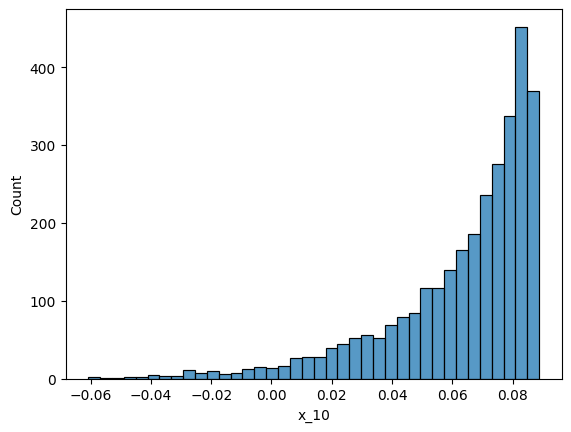

In [19]:
sns.histplot(train_prepro['x_10'])

In [20]:
train_prepro = train_prepro[(train_prepro['x_1'] < -1.2)]
train_prepro = train_prepro[(train_prepro['x_2'] > 1.17)]
train_prepro = train_prepro[(train_prepro['x_3'] > 0.87)]
train_prepro = train_prepro[(train_prepro['x_4'] > -0.4)]
train_prepro = train_prepro[(train_prepro['x_5'] < -1.6)]
train_prepro = train_prepro[(train_prepro['x_6'] < 0.51)]
train_prepro = train_prepro[(train_prepro['x_7'] < -0.08)]
train_prepro = train_prepro[(train_prepro['x_9'] < 0.4)]
train_prepro = train_prepro[(train_prepro['x_10'] > 0)]

train_x = train_prepro.drop(columns = ['ID', 'y'])
train_y = train_prepro['y']
test_x = test_prepro

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2,
                                                    shuffle=True,random_state=RANDOM_SEED)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 베이즈 최적화

In [41]:
model = RandomForestRegressor(random_state = RANDOM_SEED, n_jobs = -1)

rf_params = {
    'n_estimators': np.arange(100, 400, 2),
    'max_features': np.arange(0.1, 0.7, 0.05),
    'max_depth': np.arange(5, 40, 5),
}
kf = KFold(n_splits = 5, shuffle = True, random_state = RANDOM_SEED)

RFBO = BayesSearchCV(model, rf_params, n_iter=20, random_state=RANDOM_SEED,
    scoring='neg_mean_absolute_error', cv=kf, n_jobs = -1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train_practice = X_train.copy()
X_test_practice = X_test.copy()
y_train_practice = y_train.copy()
y_test_practice = y_test.copy()

for x in range(1, 12) :
  estimator = DecisionTreeRegressor(random_state=RANDOM_SEED)
  selector = RFE(estimator, n_features_to_select = x)
  selector = selector.fit(X_train_practice, y_train_practice)
  dt_rfe_X_train = selector.transform(X_train_practice)
  dt_rfe_X_test = selector.transform(X_test_practice)

  rf = RandomForestRegressor(random_state=RANDOM_SEED)
  rf.fit(dt_rfe_X_train, y_train)
  test_pred = rf.predict(dt_rfe_X_test)
  print('변수 {}개'.format(x))
  print(mean_squared_error(y_test, test_pred))
  print('')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
estimator = DecisionTreeRegressor(random_state=RANDOM_SEED)
selector = RFE(estimator, n_features_to_select = 8)
selector = selector.fit(X_train_practice, y_train_practice)

dt_rfe_features = selector.support_
X_train_practice.columns[dt_rfe_features]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['x_0', 'x_1', 'x_3', 'x_5', 'x_7', 'x_8', 'x_9', 'x_10'], dtype='object')

In [37]:
dt_rfe_X_train = selector.transform(X_train_practice)
dt_rfe_X_test = selector.transform(X_test_practice)
test_x = test_x.drop(columns = ['ID'])
dt_rfe_test_x = selector.transform(test_x)
dt_rfe_test_x.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(820, 8)

In [43]:
RFBO.fit(dt_rfe_X_train, y_train)

# Access the results
best_params = RFBO.best_params_
best_score = RFBO.best_score_

print("Best Parameters:", best_params)
print("Best mse Score:", best_score)

best_RF = RFBO.best_estimator_
best_RF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Parameters: OrderedDict([('max_depth', 5), ('max_features', 0.20000000000000004), ('n_estimators', 288)])
Best mse Score: -1.2423908984427983


In [46]:
best_RF.fit(dt_rfe_X_train, y_train)

# test 셋에 대한 mse 계산
test_pred = best_RF.predict(dt_rfe_X_test)
print(mean_squared_error(y_test, test_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.769111408467138


In [51]:
# 실제 예측값

real_prediction = best_RF.predict(dt_rfe_test_x)

pred_df = pd.DataFrame(real_prediction, columns=['Predicted Values'])

# 결과 출력
pred_df.to_csv('prediction_bayes_rf.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Ridge Lasso 회귀

In [48]:
X_train_practice = X_train.copy()
X_test_practice = X_test.copy()
y_train_practice = y_train.copy()
y_test_practice = y_test.copy()

estimator = DecisionTreeRegressor(random_state=RANDOM_SEED)
selector = RFE(estimator, n_features_to_select = 8)
selector = selector.fit(X_train_practice, y_train_practice)

dt_rfe_features = selector.support_
X_train_practice.columns[dt_rfe_features]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['x_0', 'x_1', 'x_3', 'x_5', 'x_7', 'x_8', 'x_9', 'x_10'], dtype='object')

In [49]:
dt_rfe_X_train = selector.transform(X_train_practice)
dt_rfe_X_test = selector.transform(X_test_practice)
#test_x = test_x.drop(columns = ['ID'])
dt_rfe_test_x = selector.transform(test_x)
dt_rfe_test_x.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(820, 8)

In [54]:
scale = StandardScaler()
train_scaled = scale.fit_transform(dt_rfe_X_train)
test_scaled = scale.transform(dt_rfe_X_test)

train_scaled = pd.DataFrame(train_scaled, columns=X_train_practice.columns[dt_rfe_features])
test_scaled = pd.DataFrame(test_scaled, columns=X_train_practice.columns[dt_rfe_features])

from sklearn.linear_model import Ridge, Lasso

kf = KFold(n_splits = 10, shuffle=False)

ridge = dict()
lasso = dict()

for alpha in [0.001,0.005, 0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 10]:
    model = Ridge(alpha=alpha)
    cross_score = cross_val_score(model, train_scaled, y_train_practice, scoring='neg_mean_squared_error',cv=kf)
    mse_score = -cross_score
    ridge[alpha] = np.mean(mse_score)
    print('Alpha = {}, Ridge의 MSE 값 = '.format(alpha),np.round(ridge[alpha], 5))

    model = Lasso(alpha=alpha)
    cross_score = cross_val_score(model, train_scaled, y_train_practice, scoring = 'neg_mean_squared_error', cv=kf)
    mse_score = -cross_score
    lasso[alpha]=np.mean(mse_score)
    print('Alpha = {}, Lasso의 MSE 값 = '.format(alpha),np.round(lasso[alpha], 5))
    print()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Alpha = 0.001, Ridge의 MSE 값 =  6.24524
Alpha = 0.001, Lasso의 MSE 값 =  6.24335

Alpha = 0.005, Ridge의 MSE 값 =  6.24523
Alpha = 0.005, Lasso의 MSE 값 =  6.23931

Alpha = 0.01, Ridge의 MSE 값 =  6.24522
Alpha = 0.01, Lasso의 MSE 값 =  6.24078

Alpha = 0.05, Ridge의 MSE 값 =  6.24513
Alpha = 0.05, Lasso의 MSE 값 =  6.24607

Alpha = 0.1, Ridge의 MSE 값 =  6.24502
Alpha = 0.1, Lasso의 MSE 값 =  6.25442

Alpha = 0.5, Ridge의 MSE 값 =  6.24417
Alpha = 0.5, Lasso의 MSE 값 =  6.49342

Alpha = 1, Ridge의 MSE 값 =  6.24321
Alpha = 1, Lasso의 MSE 값 =  7.24333

Alpha = 3, Ridge의 MSE 값 =  6.24015
Alpha = 3, Lasso의 MSE 값 =  8.10807

Alpha = 5, Ridge의 MSE 값 =  6.23792
Alpha = 5, Lasso의 MSE 값 =  8.10807

Alpha = 7, Ridge의 MSE 값 =  6.23622
Alpha = 7, Lasso의 MSE 값 =  8.10807

Alpha = 10, Ridge의 MSE 값 =  6.23429
Alpha = 10, Lasso의 MSE 값 =  8.10807



In [55]:
hyperparam_tuning_res_ridge = pd.Series(ridge)
hyperparam_tuning_res_ridge

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0.001,6.245238
0.005,6.245229
0.010,6.245217
0.050,6.245128
0.100,6.245017
0.500,6.244171
1.000,6.243209
3.000,6.240147
5.000,6.237921
7.000,6.236215


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


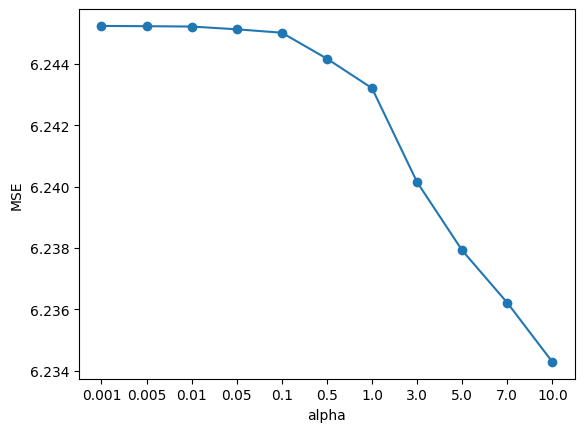

In [57]:
plt.plot(hyperparam_tuning_res_ridge.values, marker='o')
plt.xticks(ticks=np.arange(0, 11), labels=hyperparam_tuning_res_ridge.index)
plt.xlabel('alpha')
plt.ylabel('MSE');

In [58]:
hyperparam_tuning_res_lasso = pd.Series(lasso)
hyperparam_tuning_res_lasso

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0.001,6.243345
0.005,6.239313
0.010,6.240779
0.050,6.246069
0.100,6.254419
0.500,6.493423
1.000,7.243331
3.000,8.108070
5.000,8.108070
7.000,8.108070


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


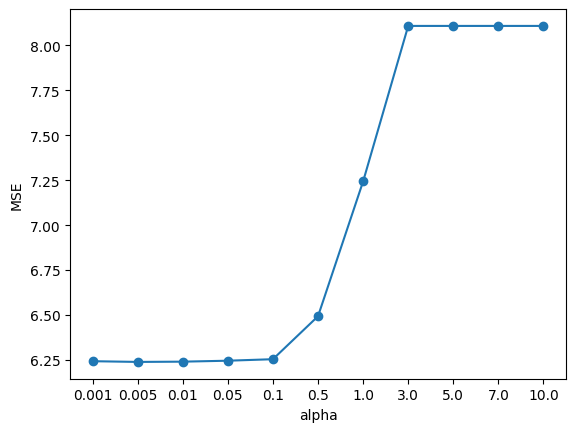

In [59]:
plt.plot(hyperparam_tuning_res_lasso.values, marker='o')
plt.xticks(ticks=np.arange(0, 11), labels=hyperparam_tuning_res_lasso.index)
plt.xlabel('alpha')
plt.ylabel('MSE');

### GA 유전 알고리즘